# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib 
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape, y.shape

((70000, 784), (70000,))

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

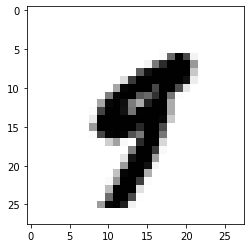

In [4]:
t = X[36000].reshape(28,28)
plt.imshow(t, cmap = matplotlib.cm.binary, interpolation = "nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [8]:
np.unique(mnist['target'])

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [7]:
a = mnist['target']

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [22]:
target_dict = {'0': 0, '1': 0, '2':0, '3':0, '4': 0, '5': 1, '6':0, '7':0, '8': 0, '9': 0}
l = []
for i in a:
    l.append(target_dict[i])
target_5 = np.array(l)

mnist['target_5'] = target_5


X_5, y_5 = mnist['data'], mnist['target_5']

X_5_train = X_5[:60000]
y_5_train = y_5 [:60000]
X_5_test = X_5[60000:]
y_5_test = y_5[60000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200).fit(X_5_train, y_5_train)
model.score(X_5_train, y_5_train)

/home/sabina/miniconda3/envs/IH_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9776666666666667

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
y_train_predict_36000 = model.predict(X_5_train[36000].reshape(1,-1))
y_train_predict_36000

array([0])

In [25]:
y_test_predict_Logistic_Regression = model.predict(X_5_test)
# with the result 0, it did predict correctly. (0 = all other numbers without 5, 1 = 5)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [13]:
never_5_clf.fit(X_5_train, y)
Never5_predict = never_5_clf.predict(X_5_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_5_test, y_test_predict_Logistic_Regression )

array([[9031,   77],
       [ 148,  744]])

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Never5_predict, y_5_test)

array([[9108,  892],
       [   0,    0]])

In [31]:
from sklearn.metrics import classification_report 
target_names = ['other number', 'five']
print(classification_report(y_5_test, y_test_predict_Logistic_Regression, target_names = target_names))

              precision    recall  f1-score   support

other number       0.98      0.99      0.99      9108
        five       0.91      0.83      0.87       892

    accuracy                           0.98     10000
   macro avg       0.95      0.91      0.93     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
from sklearn.metrics import classification_report 
target_names = ['other number', 'five']
print(classification_report(Never5_predict, y_5_test, target_names = target_names))

              precision    recall  f1-score   support

other number       1.00      0.91      0.95     10000
        five       0.00      0.00      0.00         0

    accuracy                           0.91     10000
   macro avg       0.50      0.46      0.48     10000
weighted avg       1.00      0.91      0.95     10000



/home/sabina/miniconda3/envs/IH_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# the never 5 model does not seem to work, as the result does not show any result with 5 (no "true positive 5s" and no "false negative other numbers")

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [35]:
c,d, _ = roc_curve(y_5_test, y_test_predict_Logistic_Regression)
e,f,_  = roc_curve(y_5_test, Never5_predict) 

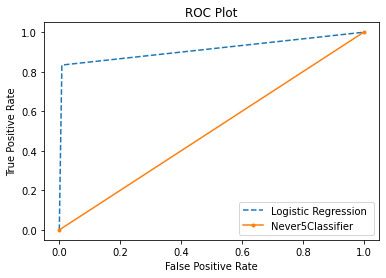

In [43]:
plt.plot(c,d, linestyle='--', label = 'Logistic Regression ')
plt.plot(e,f, marker = '.', label = 'Never5Classifier')
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Now find the roc_auc_score for each. 

In [40]:
roc_auc_score(y_5_test, y_test_predict_Logistic_Regression )

0.912813305604298

In [42]:

roc_auc_score(y_5_test, Never5_predict)


0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# The Logistic Regression works better. 